### 2.1 第一题（python例）

In [1]:
# 导入必要库
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

读取并显示图像：

In [2]:
im = cv2.imread('256.jpg')
print(im.shape)

(255, 255, 3)


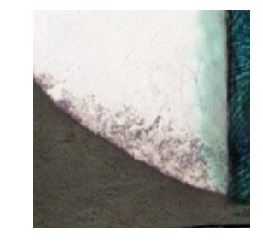

In [3]:
plt.imshow(im)
plt.axis("off")#去除坐标轴
plt.show()

opencv默认的imread是以BGR的方式进行存储的,而matplotlib的imshow默认则是以RGB格式展示,所以此处我们必须对图片的通道进行转换

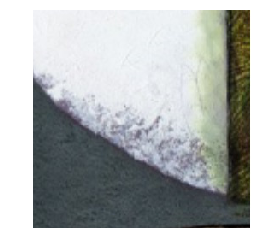

In [4]:
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis("off")
plt.show()

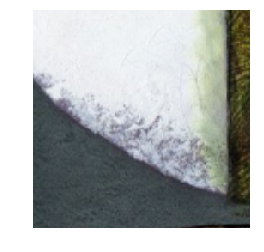

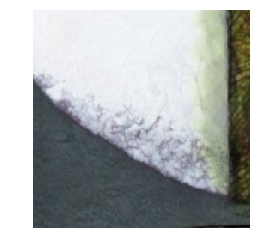

8 255 30 255
255


In [5]:
temp = im.copy()
temp = temp[1:,1:,:]
row,col,channel = temp.shape

plt.imshow(temp)
plt.axis("off")
plt.show()

for j in range(row):
    for k in range(col):
        temp[j,k,0] = max(im[j,k,0],im[j,k+1,0],im[j+1,k,0],im[j+1,k+1,0])
        temp[j,k,1] = max(im[j,k,1],im[j,k+1,1],im[j+1,k,1],im[j+1,k+1,1])
        temp[j,k,2] = max(im[j,k,2],im[j,k+1,2],im[j+1,k,2],im[j+1,k+1,2])
plt.imshow(temp)
plt.axis("off")
plt.show()

print(im[j,k,0],im[j,k+1,0],im[j+1,k,0],im[j+1,k+1,0])
print(temp[j,k,0])


In [6]:

a = max(23,34,56,78)
print(a)

78


[[244 243 242 ...  61  66 255]
 [244 243 243 ...  62  74 255]
 [244 243 243 ...  65  74 255]
 ...
 [ 67  68  70 ...  10  10 254]
 [ 69  71  73 ...   5   5 254]
 [ 69  71  73 ...  35  32 254]]


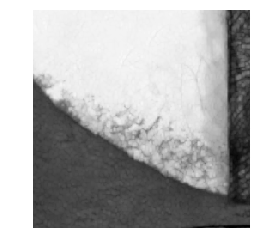

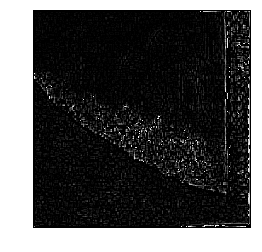

In [7]:
temp_lpls = temp.copy()
temp_lpls = temp_lpls[:,:,1]
img_lpls = np.zeros((temp_lpls.shape[0]+2,temp_lpls.shape[1]+2),dtype = np.int16)
img_padding = img_lpls.copy()
img_padding[1:img_padding.shape[0]-1,1:img_padding.shape[1]-1] = temp_lpls
#for i in range(img_lpls.shape[0]):
#    for j in range(img_lpls.shape[1]):
#        img_lpls[i,j] = img_padding[i,j]
print(temp_lpls)
plt.imshow(temp_lpls,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()  
#print(img_lpls)

for i in range(1,img_lpls.shape[0]-1):
    for j in range(1,img_lpls.shape[1]-1):
        img_lpls[i,j] = (img_padding[i-1,j-1] + img_padding[i-1,j] + img_padding[i-1,j+1]+ \
                           img_padding[i,j-1] + img_padding[i,j]*(-8) +  img_padding[i,j+1] + \
                           img_padding[i+1,j-1] + img_padding[i+1,j] +  img_padding[i+1,j+1])

img_lpls = -img_lpls
img_lpls = img_lpls%255
img_lpls[img_lpls > 150] = 0
#img_lpls[img_lpls < 20] = 0

plt.imshow(img_lpls,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()  
#print(img_lpls[:,:])

In [8]:
img_lpls = img_lpls[1:img_lpls.shape[0]-1,1:img_lpls.shape[1]-1]

print(temp.shape)
print(img_lpls.shape)


(254, 254, 3)
(254, 254)


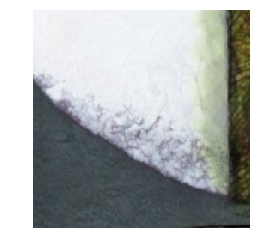

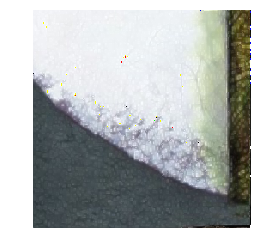

In [14]:
t = 0.3

dst = temp.copy()

dst[:,:,0] = temp[:,:,0] + img_lpls[:,:] * t
dst[:,:,1] = temp[:,:,1] + img_lpls[:,:] * t
dst[:,:,2] = temp[:,:,2] + img_lpls[:,:] * t

plt.imshow(temp,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show() 


plt.imshow(dst,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show() 